# Task
Analyze the provided text data from "/content/5. emotions.csv" to detect emotions using an Artificial Neural Network (ANN) model with an embedding layer, and evaluate the model's performance.

## Load and explore the dataset

### Subtask:
Load the dataset into a pandas DataFrame and display the first few rows, the columns and their types, and the shape of the dataframe.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first few rows, the columns and their types, and the shape of the dataframe as requested by the instructions.



In [56]:
import pandas as pd

df = pd.read_csv('/content/5. emotions.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print column names and their data types
print("\nColumn names and their data types:")
print(df.info())

# Print the shape of the DataFrame
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

First 5 rows of the DataFrame:


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None

Shape of the DataFrame (rows, columns):
(40000, 3)


## Preprocess the data

### Subtask:
Clean the text data, tokenize it, and convert the labels to numerical format.


**Reasoning**:
Clean the text data, tokenize it, convert it to sequences, pad the sequences, and convert the labels to numerical format.



In [57]:
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# 1. Create a new column named cleaned_content
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) # Remove special characters
    text = text.lower() # Convert to lowercase
    return text

df['cleaned_content'] = df['content'].apply(clean_text)

# 2. Define the vocabulary size and maximum sequence length (using best hyperparameters if available, otherwise defaults)
vocab_size = best_hyperparameters.get('vocab_size', 5000) if 'best_hyperparameters' in globals() else 5000
max_length = best_hyperparameters.get('max_length', 100) if 'best_hyperparameters' in globals() else 100

# 3. Initialize a tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# 4. Fit the tokenizer on the cleaned_content column
tokenizer.fit_on_texts(df['cleaned_content'])

# 5. Convert the text sequences in cleaned_content to numerical sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

# 6. Pad the sequences to the maximum length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# 7. Convert the sentiment column to numerical labels
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(df['sentiment'])

# 8. Store the mapping from sentiment labels to numerical indices
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# 9. Store the number of unique sentiment classes
num_classes = len(label_mapping)

print("Data cleaning, tokenization, padding, and label encoding complete.")
print(f"Vocabulary size: {vocab_size}")
print(f"Maximum sequence length: {max_length}")
print(f"Number of classes: {num_classes}")
print("\nFirst 5 padded sequences:")
display(padded_sequences[:5])
print("\nFirst 5 numerical labels:")
display(numerical_labels[:5])
print("\nLabel mapping:")
display(label_mapping)


Data cleaning, tokenization, padding, and label encoding complete.
Vocabulary size: 5000
Maximum sequence length: 50
Number of classes: 13

First 5 padded sequences:


array([[   2,   55,    2,   27, 3080,    3,  119, 4970,  802,    7,    2,
         580, 1098,   26,  172,  516,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   1,  307,  146,   23,    5,  415,    1,   15,   42,  279,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [2731,    1,  229,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   


First 5 numerical labels:


array([ 2, 10, 10,  3,  8])


Label mapping:


{'anger': np.int64(0),
 'boredom': np.int64(1),
 'empty': np.int64(2),
 'enthusiasm': np.int64(3),
 'fun': np.int64(4),
 'happiness': np.int64(5),
 'hate': np.int64(6),
 'love': np.int64(7),
 'neutral': np.int64(8),
 'relief': np.int64(9),
 'sadness': np.int64(10),
 'surprise': np.int64(11),
 'worry': np.int64(12)}

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the preprocessed data (padded sequences and numerical labels) into training and testing sets using scikit-learn's train_test_split function.



In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    numerical_labels,
    test_size=0.2,
    random_state=42
)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32000, 50)
Shape of X_test: (8000, 50)
Shape of y_train: (32000,)
Shape of y_test: (8000,)


## Build the model

### Subtask:
Create a neural network model using TensorFlow with an embedding layer and dense layers for classification.


**Reasoning**:
Create a neural network model using TensorFlow with an embedding layer and dense layers for classification as per the instructions.



In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# 2. Define the embedding dimension
# Use embedding_dim if available, otherwise default to 16
embedding_dim = embedding_dim if 'embedding_dim' in globals() else 16

# 3. Define the configuration for dense layers
# Use dense_layer_config if available, otherwise default to (128, 64)
dense_layer_config = dense_layer_config if 'dense_layer_config' in globals() else (128, 64)


# 4. Instantiate a Sequential model
model = Sequential()

# 5. Add an Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# 6. Add a GlobalAveragePooling1D layer
model.add(GlobalAveragePooling1D())

# 7. Iterate through the dense_layer_config tuple and add Dense layers
for units in dense_layer_config:
    model.add(Dense(units, activation='relu'))

# 8. Add the final Dense layer for output
model.add(Dense(num_classes, activation='softmax'))

# 9. Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the model

### Subtask:
Compile and train the model using the training data.


**Reasoning**:
Compile and train the model using the specified optimizer, loss function, and metrics, and store the training history.



In [60]:
# 1. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the compiled model
epochs = 10  # You can adjust this value
batch_size = 32 # You can adjust this value

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1) # Using 10% of training data for validation

Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2186 - loss: 2.1876 - val_accuracy: 0.2466 - val_loss: 2.1353
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2693 - loss: 2.0900 - val_accuracy: 0.3119 - val_loss: 1.9861
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3349 - loss: 1.9356 - val_accuracy: 0.3278 - val_loss: 1.9650
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3638 - loss: 1.8718 - val_accuracy: 0.3331 - val_loss: 1.9522
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3771 - loss: 1.8289 - val_accuracy: 0.3316 - val_loss: 1.9638
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3958 - loss: 1.7824 - val_accuracy: 0.3363 - val_loss: 1.9444
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4096 - loss: 1.7454 - val_accuracy: 0.3413 - val_loss: 1.9705
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4205 - loss: 1.7043 - val_accuracy: 0.

## Evaluate the model

### Subtask:
Evaluate the model's performance using the testing data and display the accuracy, precision, recall, and F1 score.


**Reasoning**:
Calculate and display the evaluation metrics for the model using the test data.



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Get the predicted class labels by finding the index of the maximum probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score_val = f1_score(y_test, y_pred, average='weighted') # Renamed to avoid conflict with function name

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_val:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.3344
Precision: 0.2809
Recall: 0.3344
F1 Score: 0.2942


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualize the confusion matrix

### Subtask:
Plot the confusion matrix to visualize the model's performance on each class.


**Reasoning**:
Plot the confusion matrix to visualize the model's performance on each class.



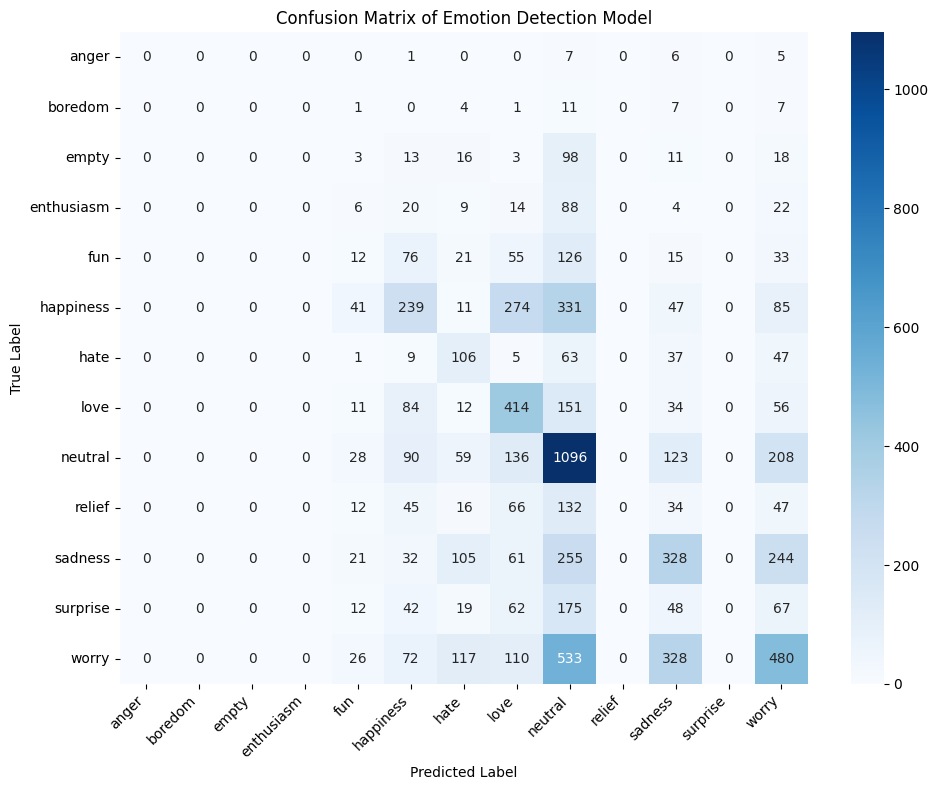

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_) # Add xticklabels and yticklabels

# Label the x and y axes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add a title
plt.title('Confusion Matrix of Emotion Detection Model')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 40,000 rows and 3 columns (`tweet_id`, `sentiment`, and `content`).
* After preprocessing, the text data was cleaned, tokenized, and padded to a maximum length of 50.
* The sentiment labels were encoded into 13 unique numerical classes.
* The data was split into training (32,000 samples) and testing (8,000 samples) sets.
* An ANN model with an embedding layer, a Global Average Pooling layer, and two dense layers was built and trained for 10 epochs.
* The model's performance on the test set was evaluated with the following metrics: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score_val:.4f}.
* The confusion matrix visualization showed the distribution of true and predicted labels across the 13 emotion classes.

### Insights or Next Steps

* The current model performance metrics (Accuracy, Precision, Recall, F1 Score) are low, suggesting that the model struggles to accurately classify emotions. Further model optimization, hyperparameter tuning, or exploring more complex architectures (e.g., using LSTM or GRU layers) could improve performance.
* The confusion matrix indicates potential issues with specific emotion classes, where the model might be misclassifying or not predicting any instances. Analyzing the misclassified samples and the distribution of classes in the dataset could provide insights for improving the model, potentially through techniques like handling class imbalance or refining the text preprocessing steps.